In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [174]:
df=pd.read_csv('./datasets/원본data.csv',index_col=0)
df

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,외환보유액,뉴스심리지수,원달러,...,CD,유가,G20,미장단기,거래량,구리,천연가스,은,금,종가
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.000000,112.100000,98.500000,10384.800000,105.100000,1853.700000,0.670000,261870733.000000,98.540000,936.800000,...,5.840000,26.816444,101.558900,1.030000,11548.000000,3.064000,7.850000,15.290000,860.000000,1000.000000
2008-02,3.900000,112.000000,98.400000,9246.100000,103.700000,1775.300000,0.530000,262364808.000000,97.880000,944.100000,...,5.460000,26.276930,101.286800,1.530000,13564.000000,3.273000,7.740000,16.916000,913.500000,897.970000
2008-03,3.200000,110.500000,98.400000,9434.400000,102.200000,1691.000000,0.310000,264245660.000000,88.120000,946.700000,...,5.170000,26.771666,100.974300,1.930000,9948.000000,3.928500,9.346000,20.180000,984.200000,873.820000
2008-04,0.400000,109.400000,98.900000,10121.700000,100.700000,1705.800000,0.140000,260482546.000000,103.730000,983.500000,...,5.390000,27.311699,100.601400,1.770000,13964.000000,3.806500,9.724000,16.935000,887.800000,965.780000
2008-05,-1.600000,106.100000,98.500000,9955.600000,98.600000,1758.200000,0.220000,258198958.000000,93.060000,1009.100000,...,5.360000,25.481760,100.145200,1.410000,16690.000000,3.694500,10.561000,16.205000,850.900000,1056.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.400000,92.700000,115.400000,10568.500000,85.200000,2336.400000,0.840000,423163664.000000,83.390000,1304.210000,...,4.030000,76.773430,98.935240,-0.720000,8411.000000,3.817500,6.738000,22.841000,1815.200000,1435.740000
2023-01,-15.400000,90.900000,111.200000,13969.700000,85.100000,2380.400000,0.450000,429967671.000000,93.790000,1269.020000,...,3.980000,78.254589,98.971380,-0.610000,10487.000000,3.795250,4.273500,24.328000,1835.800000,1343.910000
2023-02,-16.200000,91.100000,106.900000,14725.600000,84.600000,2391.300000,0.180000,425286150.000000,97.480000,1221.780000,...,3.590000,74.513809,99.024580,-0.700000,9732.000000,4.111000,2.468000,23.609000,1927.800000,1439.490000


In [175]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', '원위안', 'CD', '유가', 'G20', '미장단기', '거래량', '구리',
       '천연가스', '은', '금', '종가'],
      dtype='object')

In [176]:
## 경제심리지수, 기계류내수출, 장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스, 수출입내물가비율--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

## 변동성이 큰 것들 ->log씌운다
df['재고순환지표']+=24.9
df['재고순환지표']=np.log1p(df['재고순환지표'])
df['거래량']=np.log1p(df['거래량'])

df['원엔']=df['원엔'].diff(1)
df['구리']=df['구리'].diff(1)
df['원위안']=df['원위안'].diff(1)
df['금']=df['금'].diff(1)
df['은']=df['은'].diff(1)
df['코스피']=df['코스피'].diff(1)
df['건설수주액']=df['건설수주액'].diff(1)
df['CD']=df['CD'].diff(1)
df['유가']=df['유가'].diff(1)
df['미장단기']=df['미장단기'].diff(1)
df['외환보유액']=df['외환보유액'].diff(1)

df['종가']=df['종가'].pct_change()
df=df.dropna(axis=0)


In [177]:
df.drop(['유가','은','원위안'],axis=1,inplace=True)

In [178]:
### H0가 비정상(non-stationary)이다
### 유의수준보다 p-value가 작으면 기각 --> 정상적 데이터다

from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')

    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level

    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표,-4.223353,0.000601,4.000000,178.000000,-2.877918
경제심리지수,-3.325043,0.013795,11.000000,171.000000,-2.878595
기계류내수출,-3.823751,0.002673,11.000000,171.000000,-2.878595
건설수주액,-3.362024,0.012324,12.000000,170.000000,-2.878696
수출입물가비율,-3.070182,0.028840,13.000000,169.000000,-2.878799
코스피,-4.309950,0.000427,14.000000,168.000000,-2.878903
장단기,-3.516219,0.007580,13.000000,169.000000,-2.878799
외환보유액,-5.573405,0.000001,10.000000,172.000000,-2.878495
뉴스심리지수,-5.616294,0.000001,12.000000,170.000000,-2.878696
원달러,-3.601805,0.005727,0.000000,182.000000,-2.877555


In [179]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가'],
      dtype='object')

In [180]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터프레임으로부터 독립변수들을 선택하여 X에 저장
X = df[['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가']]

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)

    Feature   VIF Factor
0     const 19906.233237
1    재고순환지표     2.455826
2    경제심리지수     4.473925
3    기계류내수출     1.805867
4     건설수주액     1.080837
5   수출입물가비율     1.661240
6       코스피     2.757239
7       장단기     4.162331
8     외환보유액     1.580343
9    뉴스심리지수     3.833064
10      원달러     2.789008
11       원엔     1.659306
12       CD     1.759922
13      G20     3.994889
14     미장단기     1.322916
15      거래량     2.153061
16       구리     1.722130
17     천연가스     2.091600
18        금     1.360706
19       종가     1.604271


In [181]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df)            
res = model_var.select_order(6)            
res.summary()

,AIC,BIC,FPE,HQIC
0,60.08,60.42,1.233e+26,60.21
1,38.82,45.64*,7.356e+16,41.58*
2,36.86,50.15,1.166e+16,42.25
3,35.31,55.08,3.468e+15,43.33
4,34.38,60.64,2.784e+15,45.03
5,32.69,65.42,1.878e+15,45.97
6,29.75*,68.96,9.659e+14*,45.65


In [182]:
model_fit = model_var.fit(maxlags=6, ic='aic')        
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Jun, 2023
Time:                     12:51:34
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                    68.9589
Nobs:                     177.000    HQIC:                   45.6519
Log likelihood:          -5219.81    FPE:                9.65865e+14
AIC:                      29.7505    Det(Omega_mle):     7.14717e+10
--------------------------------------------------------------------
Results for equation 재고순환지표
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              8.012244         3.675740            2.180           0.029
L1.재고순환지표          1.144212         0.118877            9.625           0.000
L1.경제심리지수          0.032673         0.015580            2.097          

In [183]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df.iloc[:165][['기계류내수출','수출입물가비율','코스피','외환보유액','원엔','CD','G20','거래량','구리','종가']])             ## X_train을 endogenous 변수로 설정한 후
res = model_var.select_order(6)            ## select_order 메서드를 호출하여 최적의 차수를 선택, select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정
res.summary()

,AIC,BIC,FPE,HQIC
0,30.51,30.70,1.775e+13,30.59
1,19.59,21.71*,3.219e+08,20.45
2,18.12,22.18,7.541e+07,19.77*
3,17.79*,23.77,5.602e+07*,20.22
4,17.82,25.74,6.205e+07,21.04
5,17.90,27.74,7.510e+07,21.90
6,17.83,29.61,8.390e+07,22.61


In [184]:
model_fit = model_var.fit(maxlags=6, ic='aic')        


In [185]:
lag_order = model_fit.k_ar
print(lag_order)

3


In [186]:
import pandas as pd

# train 데이터 프레임 정의
train_data = df.iloc[:165][['기계류내수출','수출입물가비율','코스피','외환보유액','원엔','CD','G20','미장단기','거래량','구리','종가']]
train = pd.DataFrame(train_data)

# test 데이터 프레임 정의
test_data = df.iloc[165:][['기계류내수출','수출입물가비율','코스피','외환보유액','원엔','CD','G20','미장단기','거래량','구리','종가']]
test = pd.DataFrame(test_data)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VAR model
    model_var = VAR(endog=train)
    model_fit = model_var.fit(maxlags=3, ic='aic')

    # One step forecast
    forecast = model_fit.forecast(train.values[-4:], steps=1)

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)


In [187]:
pred['date']= test.index
pred=pred.set_index('date')

In [188]:
pred

,기계류내수출,수출입물가비율,코스피,외환보유액,원엔,CD,G20,미장단기,거래량,구리,종가
date,,,,,,,,,,,
2021-11,101.349211,90.165227,-49.437155,890019.679898,-0.214110,0.092644,100.857842,-0.124360,8.925875,0.142295,-0.006315
2021-12,101.142636,89.482366,-64.567178,-794440.040387,0.219204,0.075705,100.504173,-0.097233,9.099598,-0.351988,-0.015431
2022-01,105.915509,89.346643,-46.981529,-235657.945814,0.212575,0.106822,100.492530,-0.076142,9.261757,-0.269239,-0.022444
2022-02,108.898095,88.775323,-25.370782,-5154901.897959,-0.224018,0.055215,100.320886,0.077852,9.150799,-0.145732,-0.004309
2022-03,107.532533,86.744723,-72.509752,-4950663.097951,0.355480,0.053942,99.832716,-0.191325,8.742247,-0.210148,-0.071018
2022-04,103.602061,84.625156,-98.660484,-2719448.870944,-0.036367,0.139457,99.479632,-0.106323,9.146367,-0.371851,0.016540
2022-05,101.757481,85.619192,-77.328328,-3380054.884545,0.207345,0.106859,99.421319,-0.075780,8.896163,-0.428190,-0.012978
2022-06,105.546374,85.383803,-43.471624,-6091514.517241,0.456425,0.195594,99.826398,0.150763,9.188447,0.035666,-0.067457
2022-07,108.582707,86.843067,-91.847327,-7959411.346038,0.050845,0.096852,99.011436,-0.056068,8.949900,-0.307100,-0.124607


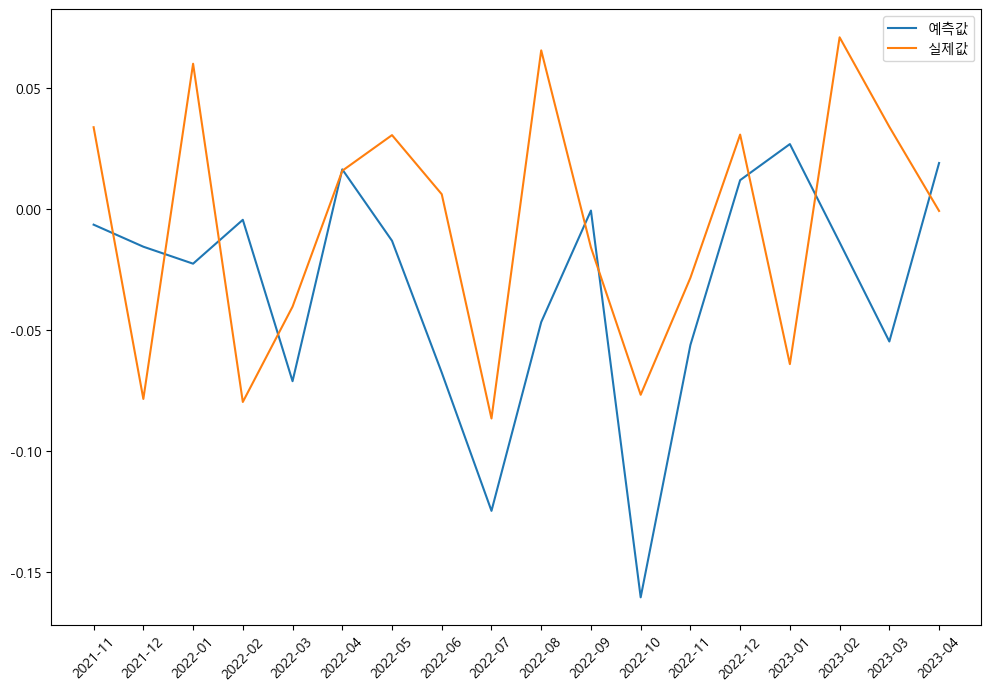

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(pred.index, pred['종가'],label='예측값')
plt.plot(test.index, test['종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()